# Analysis

1. As of 9/28/2018 4:36 p.m. CNN news received the lowest compound score, which means that people who hastag CNN are generally expressing negative emotions towards CNN's post. Perhaps due to chance, but the latest post made by CNN was on America's national parks being dry up and warm, which could lead to concerns and frustration of environmentalists.

2. Majority of the tweets remain neutral while there are few tweets scattered in positive or negative public sentiment. There's no particular sign which media source receive more negativ or positive public sentiments. The reason is probably due to the many different types of news covered by each media sources.

3. Another interesting fact worth mentioning is that public sentiment of each media source changes as I'm working on the project. It explains that public reaction to the articles covered changes based on the type of news covered more rather than the media source itself. If public sentiment ties with the media source itself, then the compound score should not have changed drastically when new posts are made. However, since this project only covers the last 100 posts, the research is very recent. To find out public's feeling toward a specific media source, we should conduct a research based larger number of tweets. 

In [39]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#Report Current Time
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [40]:
news_sentiments = {
    "Target Search": [],
    "Compound Score":[],
    "Positive Score":[],
    "Negative Score":[],
    "Neutral Score":[],
    "Tweet Ago":[],
    "Tweet Time":[]
}

In [3]:
#Set target Search
target_search = ["@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

In [41]:
counter = 1
oldest_tweet= None

for x in target_search:
    public_tweets = api.search(x, count=100, result_type= "recent",max_id = oldest_tweet)
    #Restart the Counter and Oldest Tweet for every new search
    counter = 1
    oldest_tweet= None
    for tweet in public_tweets["statuses"]:
        print(tweet["text"])
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        time = tweet["created_at"]
        tweet_datetime = datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y")

        # Add each value to the appropriate array
        news_sentiments["Target Search"].append(x)
        news_sentiments["Positive Score"].append(pos)
        news_sentiments["Negative Score"].append(neg)
        news_sentiments["Neutral Score"].append(neu)
        news_sentiments["Compound Score"].append(compound)
        news_sentiments["Tweet Ago"].append(counter)
        news_sentiments["Tweet Time"].append(tweet_datetime)
        
        oldest_tweet = tweet["id"]-1
        
        counter+=1

More
@GOP @realDonaldTrump @SenateMajLdr  @LindseyGrahamSC @SenatorTimScott @VP @RepDevinNunes @OrrinHatch… https://t.co/d9Kh2rxLgE
RT @SikhProf: Hi @BBC,

Three soldiers failed the drug test, and two of their identities were kept secret.

Selectively revealing and shami…
RT @BTSnBillboard: 🇬🇧방탄소년단 영국 BBC 최대 토크쇼
ㅤ
👍🏻 더 그레이엄 노튼 쇼 !!! 출연
ㅤ
10/12 영국 @BBC
[한국시간 10/13 토 AM 6:30🇰🇷]
@BTS_twt 아이돌 공연예정
ㅤ
영국 접수 얼쑤~
ㅤ
B…
RT @BTS__Europe: #BTS will perform #IDOL at the Graham Norton Show on @BBC when they are in London!!! 👏❤🎉

📆 Friday, October 12th 2018
📺 BB…
RT @GhioLena: What the stars &amp; gravity say about the Trump presidency in 2019 https://t.co/WkoZOlwYSj @BBCScienceNews  @BBC @BBCWorld @BBCE…
RT @Fax1g: Avec cette méthode d'enquête, ex @PresidentABO @PresidenceGA peuvent trembler. Il ne suffit plus d'avoir manipulé Procureur @FAT…
@StephenLees4 @afneil @BBC This is where the BBC is going.
RT @Lionesskeeper: Doctor Who's Peter Capaldi Gets Standing Ovation &amp; Gives Speech At Comic... h

RT @CBSNews: "There is no doubt in my mind that, while he was at Yale, he was a big partier, often drank to excess. And there had to be a n…
@DesireeResists @CBSNews Prepare for more disappointment.
RT @Whit68mailSharp: @twirpy @deemes5 @CBSNews @BarbaraMain07 @SenTedCruz #BetoforTexas
RT @CBSNews: BREAKING: Mark Judge say's he'll cooperate with any law enforcement agency tasked with "confidentially" investigating the alle…
@CBSNews For a lady rich enough to "FLY"across the World for Business and Pleasure, Shouldn't that money go to Batt… https://t.co/grbqbwPq1u
@CBSNews The American people should confiscate this money to pay for the wasted taxpayer dollars used to pay for her bogus hearing!
@beckyharvey @CBSNews Exactly how is he crazy?
@CBSNews This speaks volumes! I have no words.
RT @CBSNews: Sen. Amy Klobuchar asks Brett Kavanaugh if he has ever blacked out from drinking, and he turns the question back on her.

Kava…
RT @hannahkauthor: Justice will be served someday.
God knows.
T 

@CNN No shit Sherlock.
RT @CNN: Ali Ahmed was imprisoned at 15 years old. Now six years later, her family says they don't know where she is or what has happened t…
RT @CNN: Shockwaves from the massive bombing raids during World War II reached the edge of space and weakened the Earth's upper atmosphere,…
RT @CNN: Ali Ahmed was imprisoned at 15 years old. Now six years later, her family says they don't know where she is or what has happened t…
RT @CNN: Women confront Sen. Jeff Flake after he says he'll vote yes to Kavanuagh: “That’s what you’re telling all women in America, that t…
RT @m_lists: @RoadMN @BretBaier @FoxNews @MSNBC @CNN Total viewers: 6... AM to midnight.
RT @faustisland: @CNN REMEMBER REMEMBER THE 6th of November.
https://t.co/YdLShBY2uD @eBay @youtube @Facebook @cnn @BBCBreaking @google @BBCWorld @twitter @cnnbrk @nytimes… https://t.co/WlaJ5ddBue
RT @CNN: Meet DJ Switch: A 10-year-old girl from Ghana who wants to be a gynecologist when she grows up. Erica Armah Bra-Bulu T

@FoxNews @LindseyGrahamSC There are theatrics, and then there is delusion.  This is delusion.
RT @FoxNews: Kavanaugh friend Mark Judge agrees to cooperate with @FBI probe, denies latest allegations https://t.co/7DGISHByWf
RT @k_ovfefe: @FoxNews Hahahahahaha those polls must be scaring him!
@FoxNews @junglefruits @senatemajldr SO. He look 
like a MAN that was beyond JUDGEMENT of himself.
RT @FoxNews: .@LindseyGrahamSC: “I know I’m a single white male from South Carolina and I’ve been told I should shut up but I will not shut…
@FoxNews @edhenry Wasn't POTUS accused of not believing the Intel Community? Guess this FBI looksee means the Dems… https://t.co/vmqxz6n4Mb
It's all very well for POTUS to say Dr Ford's testimony was 'credible' - but it's not terribly helpful when he twic… https://t.co/m0taddIh1B
@edhenry @FoxNews If she refuses the FBI investigation, fine. FBI should continue without her and then Sen McConnel… https://t.co/ZH8YBkvCLZ
@FoxNews @POTUS Make sure you don't make a mist

RT @nytimes: The DeSantis campaign did not deny being behind the text messages, which appeared to target voters with Jewish last names http…
RT @nytimes: Breaking News: Senator Jeff Flake, a crucial swing vote on Brett Kavanaugh, demanded an FBI inquiry before a final vote, as a…
RT @johnddavidson: Yes, look at the photos. They're an indictment of the @nytimes claim to objective reporting, and by extension an indictm…
RT @jackshafer: "Wasted," by Mark Judge, reviewed in the @nytimes 1997. https://t.co/A7m2jxPP3k
@realDonaldTrump @POTUS @BretBaier @brithume @FoxNewsSunday   @marthamaccallum @JesseBWatters @greggutfeld… https://t.co/5AYZKssQzT
Please tell us you are all fact checking all of comments Kavanaughs made at the hearing? @CNNPolitics @TIME… https://t.co/NZoUy1v46d
@CNN @FoxNews @MSNBC @NBCNews @CBSNews @ABC @nytimes @washingtonpost Instead of reporting on the immoral illegal ac… https://t.co/2BZUOnDplW
RT @hannahkauthor: I'm sometimes critical of media. 
Media should be control

In [42]:
news_sent_df = pd.DataFrame(news_sentiments)
news_sent_df.to_csv("News Sentiment Data.csv")
news_sent_df.head()

,Target Search,Compound Score,Positive Score,Negative Score,Neutral Score,Tweet Ago,Tweet Time
0,@BBC,0.0000,0.0,0.000,1.000,1,2018-09-28 23:35:39+00:00
1,@BBC,-0.5106,0.0,0.136,0.864,2,2018-09-28 23:35:37+00:00
2,@BBC,0.0000,0.0,0.000,1.000,3,2018-09-28 23:34:27+00:00
3,@BBC,0.0000,0.0,0.000,1.000,4,2018-09-28 23:32:20+00:00
4,@BBC,0.0000,0.0,0.000,1.000,5,2018-09-28 23:32:18+00:00


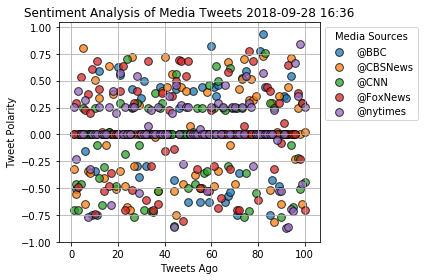

In [43]:
for x in target_search:
    #filter for the target
    filter_news = news_sent_df.loc[news_sent_df["Target Search"]==x]
    
    #Collecting Scatterplot information
    compound_score = filter_news["Compound Score"]
    tweet_ago = filter_news["Tweet Ago"]
    plt.scatter(tweet_ago, compound_score,s=60, marker ="o", label = x, edgecolors = "black", alpha = 0.75)

#Some asthetic work for the Graph
plt.legend(bbox_to_anchor=(1,1), title = "Media Sources")
plt.title(f"Sentiment Analysis of Media Tweets {now}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.tight_layout()
plt.savefig("Sentiment Analysis of Media Tweets.png")

In [44]:
#Bar Graph
#First organize the data by using groupby
mean_sent_score = news_sent_df.groupby("Target Search").mean()*100
mean_sent_score.to_csv("Mean Score for Each Target.csv")
mean_sent_score

,Compound Score,Positive Score,Negative Score,Neutral Score,Tweet Ago
Target Search,,,,,
@BBC,1.368737,5.037895,4.431579,90.534737,4800.0
@CBSNews,0.672100,8.827000,8.158000,83.015000,5050.0
@CNN,-6.500100,5.294000,8.636000,86.070000,5050.0
@FoxNews,0.999200,7.077000,7.544000,85.378000,5050.0
@nytimes,3.302400,6.132000,4.854000,89.014000,5050.0


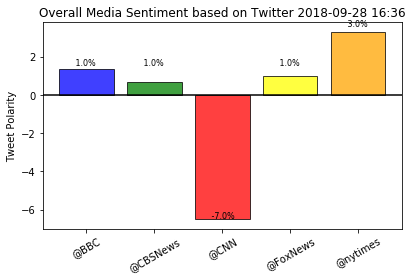

In [48]:
x_ticks = target_search
x_axis = np.arange(len(target_search))
colors = ["blue", "green", "red", "yellow", "orange"]

plt.bar(x_axis,mean_sent_score["Compound Score"], color = colors, alpha = 0.75, edgecolor="black")

#Aesthetic Work
#Use functions to label the percentages of changes
for i, v in enumerate(mean_sent_score["Compound Score"].round()):
    plt.text(i-0.2, v+0.7, " "+str(v)+"%", color='black', va='center', fontsize=8
)
plt.axhline(0, color='black')
plt.title(f"Overall Media Sentiment based on Twitter {now}")
plt.ylabel("Tweet Polarity")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, target_search, rotation =30)
plt.tight_layout()

#Save the Figure
plt.savefig("Overall Media Sentiment based on Twitter.png")